In [1]:
#use Lasso to select features
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# get the all file name under the folder
import os
import time
path = '/Users/jeremyg/Documents/GitHub/SummerIndependentProject/tickData/factors_data/'

In [2]:
# calculate the correlation matrix and heat map
data = pd.read_csv(path + 'DBF_factors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-11-02':]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
spread,1.000000,0.971756,0.931583,0.869841,0.360979,0.334465,0.157865,0.357383,0.982302,0.948465,0.900391,0.032409,-0.375576,-0.288223,0.073007,-0.202437,-0.140272
MA_5,0.971756,1.000000,0.964256,0.899136,0.342002,0.353860,0.065471,0.201286,0.997632,0.979077,0.930752,0.022600,-0.386010,-0.289498,0.071979,-0.210255,-0.068730
MA_20,0.931583,0.964256,1.000000,0.949676,0.131501,0.215992,-0.156605,0.028606,0.966997,0.996520,0.973748,-0.005688,-0.394326,-0.280630,0.076767,-0.192537,-0.035293
MA_60,0.869841,0.899136,0.949676,1.000000,-0.085771,-0.059367,-0.083229,-0.074635,0.902556,0.953374,0.993327,0.002445,-0.396539,-0.274761,0.068570,-0.152246,-0.021518
MACD,0.360979,0.342002,0.131501,-0.085771,1.000000,0.919905,0.452432,0.690023,0.335742,0.168366,-0.011445,0.070956,-0.031534,-0.078352,0.020698,-0.149496,-0.132542
MACDsignal,0.334465,0.353860,0.215992,-0.059367,0.919905,1.000000,0.066482,0.479552,0.345034,0.227153,0.028753,0.029516,-0.040084,-0.069790,0.030162,-0.162805,-0.064549
MACDhist,0.157865,0.065471,-0.156605,-0.083229,0.452432,0.066482,1.000000,0.665148,0.069614,-0.088185,-0.094512,0.113418,0.010920,-0.040648,-0.015930,-0.010137,-0.190454
RSI,0.357383,0.201286,0.028606,-0.074635,0.690023,0.479552,0.665148,1.000000,0.224758,0.066341,-0.036418,0.088040,-0.010296,-0.057818,0.010442,-0.067979,-0.305708
EMA_5,0.982302,0.997632,0.966997,0.902556,0.335742,0.345034,0.069614,0.224758,1.000000,0.981115,0.933856,0.022736,-0.387404,-0.290821,0.073379,-0.209504,-0.082149
EMA_20,0.948465,0.979077,0.996520,0.953374,0.168366,0.227153,-0.088185,0.066341,0.981115,1.000000,0.976489,0.003021,-0.397391,-0.285894,0.073870,-0.195469,-0.044459


In [3]:
data

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
2022-11-02 09:05:00,0.001857,0.000877,0.001590,0.001655,-0.000179,-0.000024,-0.000156,51.595275,0.000861,0.001331,0.001670,0.981132,7.448622,1873.058113,1.0,2.927077,0.001145
2022-11-02 09:10:00,0.003002,0.001105,0.001647,0.001581,0.000025,-0.000029,0.000055,55.282346,0.001777,0.001528,0.001717,0.962264,7.447190,2931.454023,1.0,1.915643,-0.001151
2022-11-02 09:15:00,0.001851,0.001333,0.001620,0.001553,0.000048,-0.000014,0.000062,51.075846,0.001802,0.001559,0.001722,0.943396,7.446098,3376.070039,1.0,1.362884,-0.000270
2022-11-02 09:20:00,0.001581,0.002013,0.001629,0.001480,0.000043,-0.000003,0.000045,50.111618,0.001728,0.001561,0.001717,0.924528,7.448005,4139.062102,1.0,1.791194,0.000979
2022-11-02 09:25:00,0.002560,0.002153,0.001638,0.001424,0.000117,0.000021,0.000095,53.534001,0.002006,0.001656,0.001745,0.905660,7.448270,4564.177419,1.0,2.039418,-0.001953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 13:05:00,-0.001676,-0.001324,-0.001662,-0.001677,0.000127,0.000048,0.000079,49.613421,-0.001315,-0.001589,-0.001614,0.075472,7.875689,49147.506127,1.0,0.722755,0.000580
2023-06-30 13:10:00,-0.001096,-0.001134,-0.001632,-0.001672,0.000150,0.000069,0.000081,53.719053,-0.001242,-0.001542,-0.001597,0.056604,7.875689,49947.885267,1.0,0.709043,0.000677
2023-06-30 13:15:00,-0.000419,-0.000839,-0.001576,-0.001649,0.000220,0.000099,0.000121,58.018354,-0.000968,-0.001435,-0.001558,0.037736,7.873951,51607.447162,1.0,0.677783,0.000452
2023-06-30 13:20:00,0.000033,-0.000782,-0.001488,-0.001613,0.000308,0.000141,0.000167,60.648121,-0.000634,-0.001295,-0.001506,0.018868,7.873759,54236.161032,1.0,0.688072,0.000271


In [4]:
# according to the correlation matrix, we can see that the spread is highly correlated with delta_1
list = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
# list = ['spread', 'RSI']

In [5]:
def valid_date_n_days_later(start, all_data, n):
    i = 1
    while i <= n:
        start = start + pd.DateOffset(days=1)
        if start in all_data.index:
            i = i + 1
        if start > all_data.index[-1]:
            return False
    return start

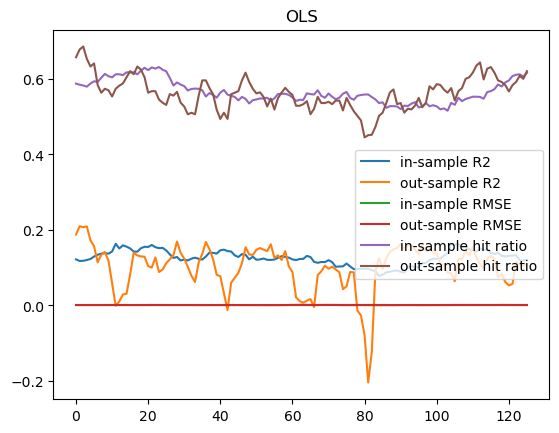

in-sample R2:  0.12639610299859694
out-sample R2:  0.10087553481450266
in-sample RMSE:  0.0009496156712669746
out-sample RMSE:  0.0009566297443706824
in-sample hit ratio:  0.5660034166441545
out-sample hit ratio:  0.561870556691008


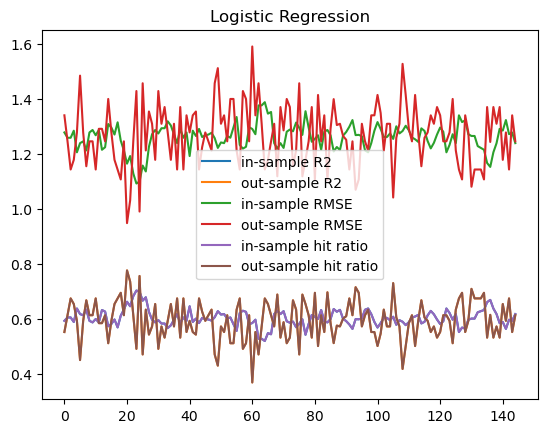

in-sample R2:  0.6018991488161572
out-sample R2:  0.5937394436342794
in-sample RMSE:  1.2609897638587346
out-sample RMSE:  1.269830868608591
in-sample hit ratio:  0.6018991488161572
out-sample hit ratio:  0.5937394436342794


In [7]:
from model_testing import test_OLS, test_logistic

test_OLS(data, list, pd.to_datetime('2022-11-02 09:05:00'), 20, 5)
test_logistic(data, list, pd.to_datetime('2022-11-02 09:05:00'), 5, 1)